In [1]:
!pip install MiniSom
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

  Running setup.py bdist_wheel for MiniSom: started
  Running setup.py bdist_wheel for MiniSom: finished with status 'done'
  Stored in directory: C:\Users\Ville\AppData\Local\pip\Cache\wheels\4a\46\e1\605a71c70f6a19f16b44fc309f6557127591c69969476cf5d1
Successfully built MiniSom


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
data = np.genfromtxt('neighborhood_features_unlabelled_b2uk.csv', delimiter=',')
data


array([[0.        , 0.        , 0.        , ..., 0.00952381, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00301205, 0.        , 0.        , ..., 0.00301205, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[[0.         0.         0.         ... 0.00952381 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00301205 0.         0.         ... 0.00301205 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\minisom.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11645568934027703
 topographic error: 0.7996219281663516

...ready!


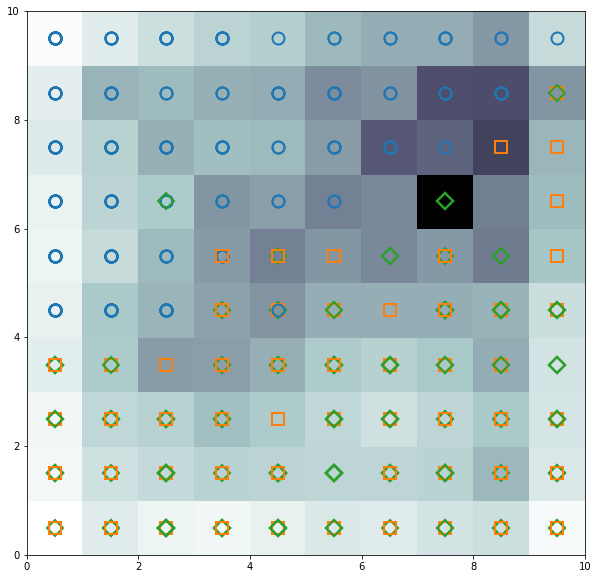

In [8]:
%autoreload 2
data = np.genfromtxt('neighborhood_features_unlabelled_b2uk.csv', delimiter=',')
# data normalization

print(data)

# Initialization and training
som = MiniSom(10, 10, 602, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 10000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('city_names_b2uk.csv', delimiter=',', dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Berlin'] = 0
t[target == 'Birmingham'] = 1
t[target == 'Manchester'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 10, 0, 10])
# plt.savefig('resulting_images/som_iris.png')
plt.show()

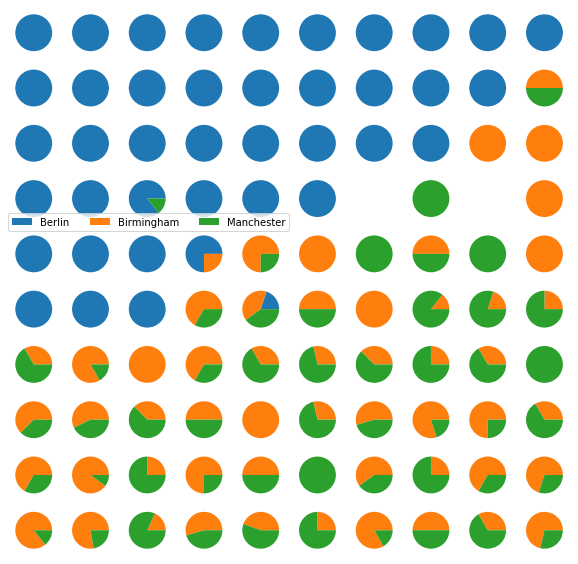

In [9]:
label = np.genfromtxt('city_names_b2uk.csv', delimiter=',', dtype=str)
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(10, 10))
the_grid = GridSpec(10, 10)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[9-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()